<a href="https://colab.research.google.com/github/pond7897/python_pro/blob/main/Project_Operation_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter 'max' for Maximization or 'min' for Minimization: max
Enter the total number of variables: 2
Enter coefficients for ['x1', 'x2'] (separated by space): 1 1
Enter the number of constraints: 3
Enter coefficients for ['x1', 'x2'] (separated by space): 5 3
[5.0, 3.0]
Enter the relation for constraint 1 (<=, =, >=): <=
Enter the RHS value for constraint 1: 30
Enter coefficients for ['x1', 'x2'] (separated by space): 3 4
[3.0, 4.0]
Enter the relation for constraint 2 (<=, =, >=): >=
Enter the RHS value for constraint 2: 36
Enter coefficients for ['x1', 'x2'] (separated by space): 0 1
[0.0, 1.0]
Enter the relation for constraint 3 (<=, =, >=): <=
Enter the RHS value for constraint 3: 7
[[5. 3.]
 [3. 4.]
 [0. 1.]]
[30. 36.  7.]
[-1. -1.]

Optimal solution:
x1 = 1.8
x2 = 7.0
Optimal value of objective function: 8.8


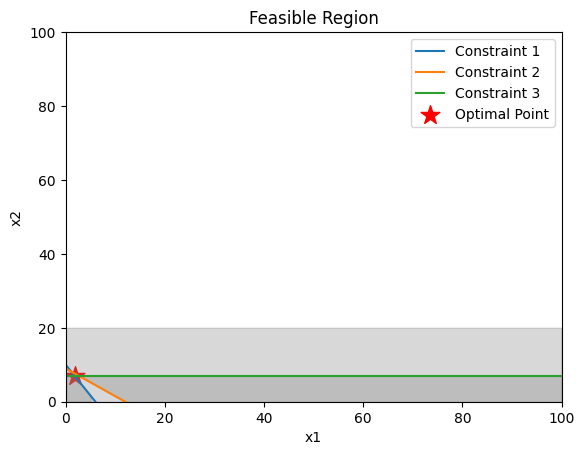

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Step 1
print("Enter 'max' for Maximization or 'min' for Minimization:", end=" ")
objective_type = input()
print("Enter the total number of variables:", end=" ")
num_variables = int(input())
print(f"Enter coefficients for {['x'+str(i+1) for i in range(num_variables)]} (separated by space):", end=" ")
objective_coefficients = list(map(float, input().split()))
print("Enter the number of constraints:", end=" ")
num_constraints = int(input())

# Step 2
constraints_coefficients = []
constraints_relation = []
constraints_rhs = []
x_bound = (0,None)
y_bound = (0,None)
for i in range(num_constraints):
    print(f"Enter coefficients for {['x'+str(j+1) for j in range(num_variables)]} (separated by space):", end=" ")
    coefficients = list(map(float, input().split()))
    print(coefficients)
    constraints_coefficients.append(coefficients)
    # check any constraints_coefficients == 0 ?
#    if (constraints_coefficients[1] != 0 or constraints_coefficients[0] !=0):
 #   else:
  #    x_bound,y_bound = (constraints_coefficients[0],None), (constraints_coefficients[1],None)

    print(f"Enter the relation for constraint {i+1} (<=, =, >=):", end=" ")
    relation = input()
    constraints_relation.append(relation)
    print(f"Enter the RHS value for constraint {i+1}:", end=" ")
    rhs = float(input())
    constraints_rhs.append(rhs)
  # Add conditions for '=' constraints
for i in range(num_constraints):
    if constraints_relation[i] == '=':
        A_eq = np.array(constraints_coefficients[i])
        b_eq = np.array([constraints_rhs[i]])
    else:
        A_eq = np.zeros(num_variables)
        b_eq = 0

# Step 3
# Plotting constraints
for i in range(num_constraints):
    x = np.linspace(0, 100, 100)
    if constraints_coefficients[i][1] == 0:
        plt.axvline(x=constraints_rhs[i]/constraints_coefficients[i][0], label=f'Constraint {i+1}', linestyle='--')
    else:
        y = (constraints_rhs[i] - constraints_coefficients[i][0]*x) / constraints_coefficients[i][1]
        plt.plot(x, y, label=f'Constraint {i+1}')

# Solve linear programming problem
c = -np.array(objective_coefficients) if objective_type == 'max' else -np.array(objective_coefficients)
A = np.array(constraints_coefficients)
b = np.array(constraints_rhs)

print(A)
print(b)
print(c)

result = linprog(c, A_ub=A, b_ub=b, bounds= [x_bound,y_bound], method='highs')

# Plot optimal point
plt.scatter(result.x[0], result.x[1], color='red', marker='*', s=200, label='Optimal Point')

# Plot the feasible region
x = np.linspace(0, 100, 100)
for i in range(num_constraints):
    if constraints_relation[i] == '<=':
        y = (constraints_rhs[i] - constraints_coefficients[i][0]*x) / constraints_coefficients[i][1]
        plt.fill_between(x, 0, y, where=(y >= 0), color='gray', alpha=0.3)
    elif constraints_relation[i] == '=':
        y = (constraints_rhs[i] - constraints_coefficients[i][0]*x) / constraints_coefficients[i][1]
        plt.plot(x, y, label=f'Constraint {i+1} (Equality)', linestyle='--', color='orange')
    elif constraints_relation[i] == '>=':
        y = (constraints_rhs[i] - constraints_coefficients[i][0]*x) / constraints_coefficients[i][1]
        plt.fill_between(x, y, 20, where=(y <= 20), color='gray', alpha=0.3)


plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Feasible Region')

# Display optimal solution and value of the objective function
print("\nOptimal solution:")
for i in range(num_variables):
    print(f"x{i+1} = {result.x[i]}")
print(f"Optimal value of objective function: {-result.fun}")

plt.show()


Enter 'max' for Maximization or 'min' for Minimization: min
Enter the total number of variables: 2
Enter coefficients for ['x1', 'x2'] (separated by space): 7 9
Enter the number of constraints: 2
Enter coefficients for ['x1', 'x2'] (separated by space): 3 6
Enter the relation for constraint 1 (<=, =, >=): >=
Enter the RHS value for constraint 1: 36
Enter coefficients for ['x1', 'x2'] (separated by space): 8 4
Enter the relation for constraint 2 (<=, =, >=): >=
Enter the RHS value for constraint 2: 64

Optimal solution:
x1 = 0.0
x2 = 0.0
Optimal value of objective function: 0


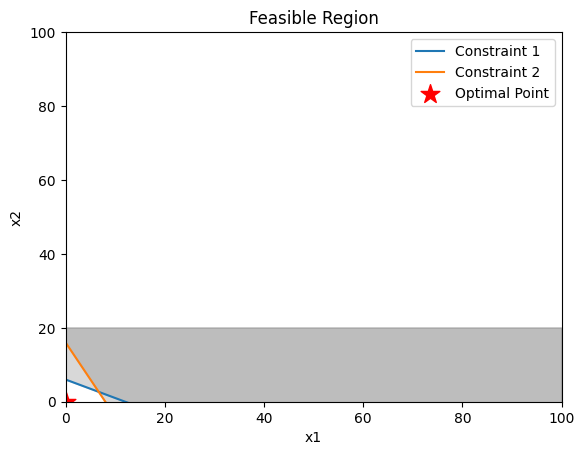

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Step 1
print("Enter 'max' for Maximization or 'min' for Minimization:", end=" ")
objective_type = input()
print("Enter the total number of variables:", end=" ")
num_variables = int(input())
print(f"Enter coefficients for {['x'+str(i+1) for i in range(num_variables)]} (separated by space):", end=" ")
objective_coefficients = list(map(float, input().split()))
print("Enter the number of constraints:", end=" ")
num_constraints = int(input())

# Step 2
constraints_coefficients = []
constraints_relation = []
constraints_rhs = []
for i in range(num_constraints):
    print(f"Enter coefficients for {['x'+str(j+1) for j in range(num_variables)]} (separated by space):", end=" ")
    coefficients = list(map(float, input().split()))
    constraints_coefficients.append(coefficients)
    print(f"Enter the relation for constraint {i+1} (<=, =, >=):", end=" ")
    relation = input()
    constraints_relation.append(relation)
    print(f"Enter the RHS value for constraint {i+1}:", end=" ")
    rhs = float(input())
    constraints_rhs.append(rhs)

# Add conditions for '=' constraints
A_eq_list = []
b_eq_list = []
for i in range(num_constraints):
    if constraints_relation[i] == '=':
        A_eq_list.append(constraints_coefficients[i])
        b_eq_list.append(constraints_rhs[i])

A_eq = np.array(A_eq_list) if A_eq_list else None
b_eq = np.array(b_eq_list) if b_eq_list else None

# Step 3
# Plotting constraints
for i in range(num_constraints):
    x = np.linspace(0, 100, 100)
    if constraints_coefficients[i][1] == 0:
        plt.axvline(x=constraints_rhs[i]/constraints_coefficients[i][0], label=f'Constraint {i+1}', linestyle='--')
    else:
        y = (constraints_rhs[i] - constraints_coefficients[i][0]*x) / constraints_coefficients[i][1]
        plt.plot(x, y, label=f'Constraint {i+1}')

# Solve linear programming problem
c = -np.array(objective_coefficients) if objective_type == 'max' else -np.array(objective_coefficients)
A = np.array(constraints_coefficients)
b = np.array(constraints_rhs)

# Solve with equality constraints if they exist
if A_eq is not None and b_eq is not None:
    result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, method='highs')
else:
    result = {"x": np.zeros(num_variables), "fun": 0}

# Check if the result is not None before using result["x"]
if result is not None and result.get("x") is not None:
    # Plot optimal point
    plt.scatter(result["x"][0], result["x"][1], color='red', marker='*', s=200, label='Optimal Point')

# Plot the feasible region
x = np.linspace(0, 100, 100)
for i in range(num_constraints):
    if constraints_relation[i] == '<=':
        y = (constraints_rhs[i] - constraints_coefficients[i][0]*x) / constraints_coefficients[i][1]
        plt.fill_between(x, 0, y, where=(y >= 0), color='gray', alpha=0.3)
    elif constraints_relation[i] == '=':
        y = (constraints_rhs[i] - constraints_coefficients[i][0]*x) / constraints_coefficients[i][1]
        plt.plot(x, y, label=f'Constraint {i+1} (Equality)', linestyle='--', color='orange')
    elif constraints_relation[i] == '>=':
        y = (constraints_rhs[i] - constraints_coefficients[i][0]*x) / constraints_coefficients[i][1]
        plt.fill_between(x, y, 20, where=(y <= 20), color='gray', alpha=0.3)

# Set xlim and ylim to include the optimal point
plt.xlim(0, 100)  # Set the x-axis limit
plt.ylim(0, 100)  # Set the y-axis limit

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Feasible Region')

# Display optimal solution and value of the objective function
print("\nOptimal solution:")
if result is not None and result.get("x") is not None:
    for i in range(num_variables):
        print(f"x{i+1} = {result['x'][i]}")
    print(f"Optimal value of objective function: {-result['fun']}")
else:
    print("No optimal solution found.")

plt.show()


In [72]:
import pulp as p

print("Enter 'max' for Maximization or 'min' for Minimization:", end=" ")
objective_type = input()

# ตรวจสอบว่า input max หรือ min
Lp_prob = p.LpProblem('Problem', p.LpMaximize if objective_type == 'max' else p.LpMinimize)

# รับค่าว่ามีกี่ตัวแปร
print("Enter the total number of variables:", end=" ")
num_variables = int(input())
variables = [p.LpVariable(f"x{i+1}",lowBound= 0) for i in range(1,num_variables + 1)]

# รับค่าสัมประสิทธิ์หน้าตัวแปรของแต่ละ x
print(f"Enter coefficients for {variables} (separated by space):", end=" ")
objective_coefficients = list(map(float, input().split()))
coefficients = sum(objective_coefficients[i]*variables[i] for i in range(num_variables))
Lp_prob += coefficients
print("Enter the number of constraints:", end=" ")
num_constraints = int(input())

for i in range(num_constraints):
  print(f"Enter coefficients for {variables} (separated by space):", end=" ")
  constraints_coefficients = list(map(float, input().split()))
  coefficients_sum = sum(constraint_coefficients[i] * variables[i] for i in range(num_variables))

# Lp_prob += 1*x + 1*y

Lp_prob += 5*x + 3*y  <= 30
Lp_prob += 3*x + 4*y  >= 36
Lp_prob +=  y  <= 7

print(Lp_prob)
status = Lp_prob.solve()
print(p.LpStatus[status])

print(p.value(x), p.value(y), p.value(Lp_prob.objective))


Problem:
MINIMIZE
3*x + 5*y + 0
SUBJECT TO
_C1: 2 x + 3 y >= 12

_C2: - x + y <= 3

_C3: x >= 4

_C4: y <= 3

VARIABLES
x Continuous
y Continuous

Optimal
6.0 0.0 18.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 39.7 MB/s eta 0:00:00


Enter 'max' for Maximization or 'min' for Minimization: max
Enter the total number of variables: 2
Enter coefficients for [x1, x2] (separated by space): 7 5
Enter the number of constraints: 2
Enter coefficients for [x1, x2] (separated by space): 2 1
Enter the relation for constraint 1 (<=, =, >=): <=
Enter the RHS value for constraint 1: 100
Enter coefficients for [x1, x2] (separated by space): 4 3
Enter the relation for constraint 2 (<=, =, >=): <=
Enter the RHS value for constraint 2: 240
Problem:
MAXIMIZE
7.0*x1 + 5.0*x2 + 0.0
SUBJECT TO
_C1: 2 x1 + x2 <= 100

_C2: 4 x1 + 3 x2 <= 240

VARIABLES
x1 Continuous
x2 Continuous

Optimal
x1: 30.0
x2: 40.0
Objective Value: 410.0


ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

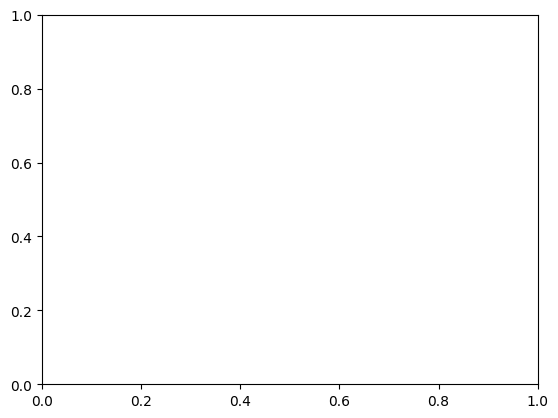

In [84]:
import pulp as p
import matplotlib.pyplot as plt
import numpy as np

print("Enter 'max' for Maximization or 'min' for Minimization:", end=" ")
objective_type = input()
Lp_prob = p.LpProblem('Problem', p.LpMaximize if objective_type == 'max' else p.LpMinimize)

print("Enter the total number of variables:", end=" ")
num_vars = int(input())
variables = [p.LpVariable(f"x{i}", lowBound=0) for i in range(1, num_vars + 1)]

print(f"Enter coefficients for {variables} (separated by space):", end=" ")
coefficients = list(map(float, input().split()))
objective_function = sum(coefficients[i] * variables[i] for i in range(num_vars))
Lp_prob += objective_function

print("Enter the number of constraints:", end=" ")
num_constraints = int(input())

constraints = []
for i in range(num_constraints):
    print(f"Enter coefficients for {variables} (separated by space):", end=" ")
    constraint_coefficients = list(map(float, input().split()))

    print(f"Enter the relation for constraint {i + 1} (<=, =, >=):", end=" ")
    relation = input()

    print(f"Enter the RHS value for constraint {i + 1}:", end=" ")
    rhs_value = float(input())

    constraint_expression = sum(constraint_coefficients[j] * variables[j] for j in range(num_vars))

    if relation == "<=":
        Lp_prob += constraint_expression <= rhs_value
    elif relation == "=":
        Lp_prob += constraint_expression == rhs_value
    elif relation == ">=":
        Lp_prob += constraint_expression >= rhs_value

print(Lp_prob)
status = Lp_prob.solve()
print(p.LpStatus[status])

for i in range(num_vars):
    print(f"{variables[i].name}: {p.value(variables[i])}")

print(f"Objective Value: {p.value(Lp_prob.objective)}")

plt.title('LPP:Graphical Solution')

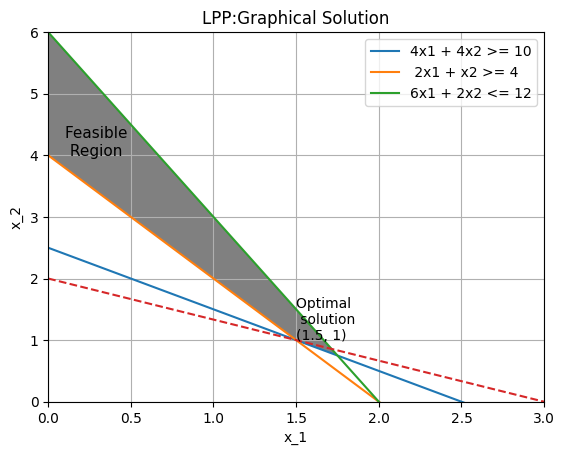

In [89]:
# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 2.5 - x, label = '4x1 + 4x2 >= 10')
plt.plot(x, 4 - 2 * x, label= ' 2x1 + x2 >= 4')
plt.plot(x, 6 - 3 * x, label = '6x1 + 2x2 <= 12')
plt.plot(x, 2 - 2/3*x, '--')

# Define the boundaries of the feasible area in the plot
x = [0, 1.5, 1.75, 0]
y = [4, 1, 0.75, 6]
plt.fill(x, y, 'grey')

plt.text(0.1, 4, 'Feasible \n Region', size = '11')
plt.annotate('Optimal \n solution\n(1.5, 1)', xy = (1.5, 1.0))

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title('LPP:Graphical Solution')
plt.axis([0, 3, 0, 6])
plt.grid(True)
plt.legend()
plt.show()